# Classification of Dadjokes and Antijokes
## Part 1 - Data Cleaning, Preprocessing and EDA

## Problem Statement
This projects will examine two datasets of jokes from r/dadjokes and r/antijokes. 

**What is a Dadjoke and Antijoke?**

Firstly, a dadjoke is:
- A **wholesome short joke typically told by fathers with a punchline that is often an obvious or predictable pun or play on words**.
    - Q1: My wife tells me I have 2 major faults,
    - A1: I don't listen - and something else.
    - Q2: I recently decided to learn sign language...
    - A2: So that I can tell jokes nobody has ever heard.
- Dadjokes are usually **inoffensive, told with sincere humorous intent and more accepted by the public**. 


On the other hand, an antijoke is:
-  A **joke that starts like a standard joke, but then turns out not to be a joke at all**. The **surprise element** thus becoming the joke.
    - Q1: If this post reaches 1000 upvotes. 
    - A1: That means at least 1000 people upvoted.
    - Q2: Ok, so a Muslim, an Atheist, and a Jew walk into a bar... 
    - A2: And they have a really nice time.
- Antijokes may be **more offensive, and the format is not as widely accepted by the public** as Dadjokes.

**Aim of Project**

This project aims to assist **any services that need their employee to curate and pick dadjokes** from a large number of jokes containing both dadjokes and antijokes. Such services include magazines, newspapers (that has a jokes column) or applications that sent their subscriber jokes on a daily basis.

The aim of this project will be to:
1. **Create a model that classifies if a joke is a dadjoke** (or an antijoke)
2. Find out what **words are the most deterministic of dadjokes and antijokes**

In order to achieve the aim specified above, I will train multiple classification models on the two jokes dataset. I will look at the model statistics and ensure that it is not overfitting to the training data while producing the best model to tell dadjokes from antijokes. 



## Data Information
This projects makes use of two dataset scrapped from reddit. 

1. The first dataset consist of records scrapped from the **r/antijokes subreddit**. It contains information for 942 entries/records.

2. The second dataset consist of records scrapped from the **r/dadjokes subreddit**. It contains information for 1528 entries/records.

**Data Dictionary**

The data dictionary for both datasets are the same, as follow.

|Feature|Type|Description|
|---|---|---|
|subreddit|object|The subreddit from which the record originated (Label)| 
|original_title|object|The title of the record| 
|original_post|object|The post of the record| 
|url|object|The URL of the record (for reference)| 



## Contents
- [Import Libraries and Dataset](#Import-Libraries-and-Datasets)
- [Data Cleaning & Preprocessing](#Data-Cleaning-&-Preprocessing)
    - [Drop Null Records](#Drop-Null-Records)
    - [Basic Text Processing](#Basic-Text-Processing)
    - [Remove Outliers](#Remove-Outliers)
- [EDA - Text Visualization](#EDA---Text-Visualization)
    - [Top N K-gram Words Barplots](#Top-N-K-gram-Words-Barplots)
    - [Wordcloud](#Wordcloud)

##  Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('whitegrid')

from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# import datasets

anti_df = pd.read_csv('../datasets/antijokes_29_Nov_1730_Combined.csv')
dad_df = pd.read_csv('../datasets/dadjokes_29_Nov_1730_Combined.csv')

In [3]:
anti_df.head()

,subreddit,original_title,original_post,url
0,AntiJokes,You know what they say about black guys in bed,they are in a bed,https://www.reddit.com/r/AntiJokes/comments/k0...
1,AntiJokes,What's an octopus' favorite month?,Despite being an extraordinarily brilliant spe...,https://www.reddit.com/r/AntiJokes/comments/k0...
2,AntiJokes,What do you call a melted snowman?,Water,https://www.reddit.com/r/AntiJokes/comments/k0...
3,AntiJokes,What did the ice cream say to the old man,Jesus fuck I just want an upvote I don’t even ...,https://www.reddit.com/r/AntiJokes/comments/jz...
4,AntiJokes,A bartender walks into a bar,He gets working,https://www.reddit.com/r/AntiJokes/comments/k0...


In [4]:
anti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subreddit       942 non-null    object
 1   original_title  942 non-null    object
 2   original_post   877 non-null    object
 3   url             942 non-null    object
dtypes: object(4)
memory usage: 29.6+ KB


In [5]:
dad_df.head()

,subreddit,original_title,original_post,url
0,dadjokes,We just found out my Grandpa is addicted to Vi...,No one is taking it harder than my Grandma.,https://www.reddit.com/r/dadjokes/comments/k0i...
1,dadjokes,What do you call a line of men waiting to get ...,A barberqueue,https://www.reddit.com/r/dadjokes/comments/k04...
2,dadjokes,Why is dark written with a K not a C?,Because you can't C in the dark,https://www.reddit.com/r/dadjokes/comments/k0j...
3,dadjokes,I watched Bohemian Rhapsody three times in a r...,It must be the high Mercury content.,https://www.reddit.com/r/dadjokes/comments/k0g...
4,dadjokes,I recently decided to learn sign language...,So that I can tell jokes nobody has ever heard.,https://www.reddit.com/r/dadjokes/comments/k04...


In [6]:
dad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subreddit       1528 non-null   object
 1   original_title  1528 non-null   object
 2   original_post   1517 non-null   object
 3   url             1528 non-null   object
dtypes: object(4)
memory usage: 47.9+ KB


# Data Cleaning & Preprocessing

## Drop Null Records

In [7]:
# find records with no posts
anti_df.isnull().sum()

subreddit          0
original_title     0
original_post     65
url                0
dtype: int64

In [8]:
# find records with no posts
anti_df.isnull().sum()

# drop the record with no post
anti_df.drop(index=anti_df[anti_df['original_post'].isnull() == True].index, inplace=True)

# reset the index for ease of reference by index
anti_df.reset_index(drop=True, inplace=True)

# check to ensure that there is no more null values
anti_df.isnull().sum()

subreddit         0
original_title    0
original_post     0
url               0
dtype: int64

In [9]:
# find records with no posts
dad_df.isnull().sum()

subreddit          0
original_title     0
original_post     11
url                0
dtype: int64

In [10]:
# drop the record with no post
dad_df.drop(index=dad_df[dad_df['original_post'].isnull() == True].index, inplace=True)

# reset the index for ease of reference by index
dad_df.reset_index(drop=True, inplace=True)

# check to ensure that there is no more null values
dad_df.isnull().sum()

subreddit         0
original_title    0
original_post     0
url               0
dtype: int64

In [11]:
# find the number of records remaining in the dataframe
anti_df.shape

(877, 4)

In [12]:
# find the number of posts in the dataframe
dad_df.shape

(1517, 4)

## Basic Text Processing
I will do basic text processing:
1. Remove non-letters
2. Lower case and split each word
3. Lemmatize the individual words - to remove the plural and different tenses
4. Join the words together

I will not be doing stopwords removal at this stage, I will test the effect of stopwords on the accuracy of the result in the modeling stage.

In [13]:
# define text processing function
def basic_text_processing(text):

    # remove non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", text)

    # convert each word to lower case
    words = letters_only.lower().split()

    # instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()

    # lemmatize tokens and remove the word 'dad' and 'anti'
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words] 
                        
    # remove the word 'dad' and 'anti'
    cleaned_words = [word for word in lemmatized_words 
                     if word not in ['dad', 'anti']]
                        
    return (" ".join(cleaned_words))

In [14]:
# conduct basic text processing on the original_title and save it to 'title'
# count the number of words in title remaining after text processing and save that to 'title_len'
anti_df['title'] = anti_df['original_title'].map(basic_text_processing)
anti_df['title_len'] = anti_df['title'].map(lambda x: len(x.split()))

# similar to above, conduct basic text processing on original post and save it to 'post'
# count the number of words in post remaining after text processing and save that to 'post_len'
anti_df['post'] = anti_df['original_post'].map(basic_text_processing)
anti_df['post_len'] = anti_df['post'].map(lambda x: len(x.split()))

In [15]:
# conduct basic text processing on the original_title and save it to 'title'
# count the number of words in title remaining after text processing and save that to 'title_len'
dad_df['title'] = dad_df['original_title'].map(basic_text_processing)
dad_df['title_len'] = dad_df['title'].map(lambda x: len(x.split()))

# similar to above, conduct basic text processing on original post and save it to 'post'
# count the number of words in post remaining after text processing and save that to 'post_len'
dad_df['post'] = dad_df['original_post'].map(basic_text_processing)
dad_df['post_len'] = dad_df['post'].map(lambda x: len(x.split()))

In [16]:
anti_df.head()

,subreddit,original_title,original_post,url,title,title_len,post,post_len
0,AntiJokes,You know what they say about black guys in bed,they are in a bed,https://www.reddit.com/r/AntiJokes/comments/k0...,you know what they say about black guy in bed,10,they are in a bed,5
1,AntiJokes,What's an octopus' favorite month?,Despite being an extraordinarily brilliant spe...,https://www.reddit.com/r/AntiJokes/comments/k0...,what s an octopus favorite month,6,despite being an extraordinarily brilliant spe...,16
2,AntiJokes,What do you call a melted snowman?,Water,https://www.reddit.com/r/AntiJokes/comments/k0...,what do you call a melted snowman,7,water,1
3,AntiJokes,What did the ice cream say to the old man,Jesus fuck I just want an upvote I don’t even ...,https://www.reddit.com/r/AntiJokes/comments/jz...,what did the ice cream say to the old man,10,jesus fuck i just want an upvote i don t even ...,13
4,AntiJokes,A bartender walks into a bar,He gets working,https://www.reddit.com/r/AntiJokes/comments/k0...,a bartender walk into a bar,6,he get working,3


In [17]:
dad_df.head()

,subreddit,original_title,original_post,url,title,title_len,post,post_len
0,dadjokes,We just found out my Grandpa is addicted to Vi...,No one is taking it harder than my Grandma.,https://www.reddit.com/r/dadjokes/comments/k0i...,we just found out my grandpa is addicted to vi...,10,no one is taking it harder than my grandma,9
1,dadjokes,What do you call a line of men waiting to get ...,A barberqueue,https://www.reddit.com/r/dadjokes/comments/k04...,what do you call a line of men waiting to get ...,12,a barberqueue,2
2,dadjokes,Why is dark written with a K not a C?,Because you can't C in the dark,https://www.reddit.com/r/dadjokes/comments/k0j...,why is dark written with a k not a c,10,because you can t c in the dark,8
3,dadjokes,I watched Bohemian Rhapsody three times in a r...,It must be the high Mercury content.,https://www.reddit.com/r/dadjokes/comments/k0g...,i watched bohemian rhapsody three time in a ro...,16,it must be the high mercury content,7
4,dadjokes,I recently decided to learn sign language...,So that I can tell jokes nobody has ever heard.,https://www.reddit.com/r/dadjokes/comments/k04...,i recently decided to learn sign language,7,so that i can tell joke nobody ha ever heard,10


## Remove Outliers
The records have varying length of titles and posts. In order to focus the model to **classify jokes of normal length**, I will remove the outliers in terms of the length of title/post. This is because there are some jokes which are more like short stories and may turn off some readers. 

Removing the outliers also helps to ensure that the **ML model is learning from the actual words and not the length of records**.

In [18]:
# create a dataframe containing all the length of words with
# their subreddit (antijokes or dadjokes) and type attributes (title or post)

# this dataframe will be used to plot comparison boxplot
# this plot will provide for clearer comparison of between the two subreddits

list_of_len = anti_df['title_len'].tolist() + anti_df['post_len'].tolist() + \
    dad_df['title_len'].tolist() + dad_df['post_len'].tolist()

subreddit = ['Antijokes'] * 2 * len(anti_df) + ['Dadjokes'] * 2 * len(dad_df)

type_of_post = ['Title'] * len(anti_df) + ['Post'] * len(anti_df) + \
    ['Title'] * len(dad_df) + ['Post'] * len(dad_df)

post_len_df = pd.DataFrame({'length': list_of_len,
                            'subreddit': subreddit,
                            'type': type_of_post})

In [19]:
# check that the dataframe is in the right format
post_len_df.head()

,length,subreddit,type
0,10,Antijokes,Title
1,6,Antijokes,Title
2,7,Antijokes,Title
3,10,Antijokes,Title
4,6,Antijokes,Title


### Boxplot - Length of Titles and Posts
I will use boxplot to have a general idea of the length of titles and posts.

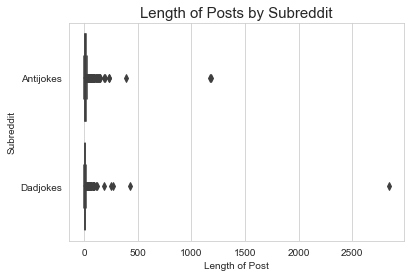

In [20]:
# plot boxplot of the length of posts by the subreddit
sns.boxplot(x='length', y='subreddit',
            data=post_len_df[post_len_df['type'] == 'Post'])
plt.title('Length of Posts by Subreddit', fontsize = 15)
plt.ylabel('Subreddit')
plt.xlabel('Length of Post')
plt.show()

There are a few obvious outliers, with length of post more than 1000. These records can be dropped. I will plot the boxplot again, limiting the length of post to 500 to see a clearer picture.

In [21]:
# out of curiosity, check which post have more than 2000 words
dad_df.loc[dad_df['post_len'] > 2000]

,subreddit,original_title,original_post,url,title,title_len,post,post_len
865,dadjokes,A giant list of puns,What do you call a fake noodle? An Impasta.\n...,https://www.reddit.com/r/dadjokes/comments/k1t...,a giant list of pun,5,what do you call a fake noodle an impasta i wo...,2840


The record with more than 2000 words is a huge list of puns. Make sense!

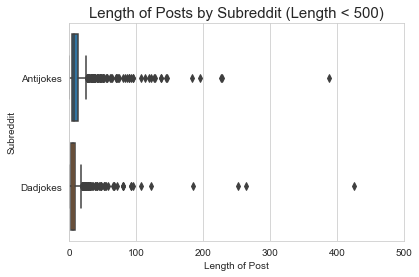

In [22]:
# plot boxplot of the length of posts by the subreddit for posts with length < 500
sns.boxplot(x='length', y='subreddit',data=post_len_df[post_len_df['type'] == 'Post'])
plt.xlim(0, 500)
plt.title('Length of Posts by Subreddit (Length < 500)', fontsize = 15)
plt.ylabel('Subreddit')
plt.xlabel('Length of Post')
plt.show()

Even looking at length of 500, it is also obvious that there are many posts with much smaller length. I will plot the boxplot again, limiting the length to 100.

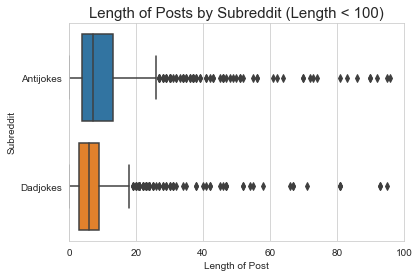

In [23]:
# plot boxplot of the length of posts by the subreddit for posts with length < 100
sns.boxplot(x='length', y='subreddit',data=post_len_df[post_len_df['type'] == 'Post'])
plt.xlim(0, 100)
plt.title('Length of Posts by Subreddit (Length < 100)', fontsize = 15)
plt.ylabel('Subreddit')
plt.xlabel('Length of Post')
plt.show()

From the above boxplot, it seems that majority of the posts from both reddits have length less than 60.

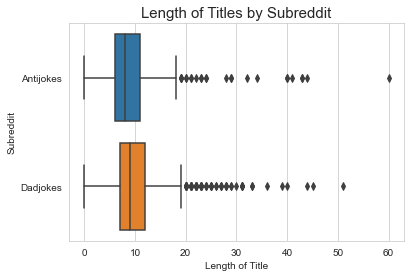

In [24]:
# plot boxplot of the length of titles by the subreddit
sns.boxplot(x='length', y='subreddit', data=post_len_df[post_len_df['type'] == 'Title'])
plt.title('Length of Titles by Subreddit', fontsize = 15)
plt.ylabel('Subreddit')
plt.xlabel('Length of Title')
plt.show()

Seems that majority of titles from both subreddits have length less than 40.

### Histograms of Length of Titles and Posts
To have a better understanding of the distribution of length of post and title, I will plot the histograms of them below before deciding what is the range length of titles and posts to be used.

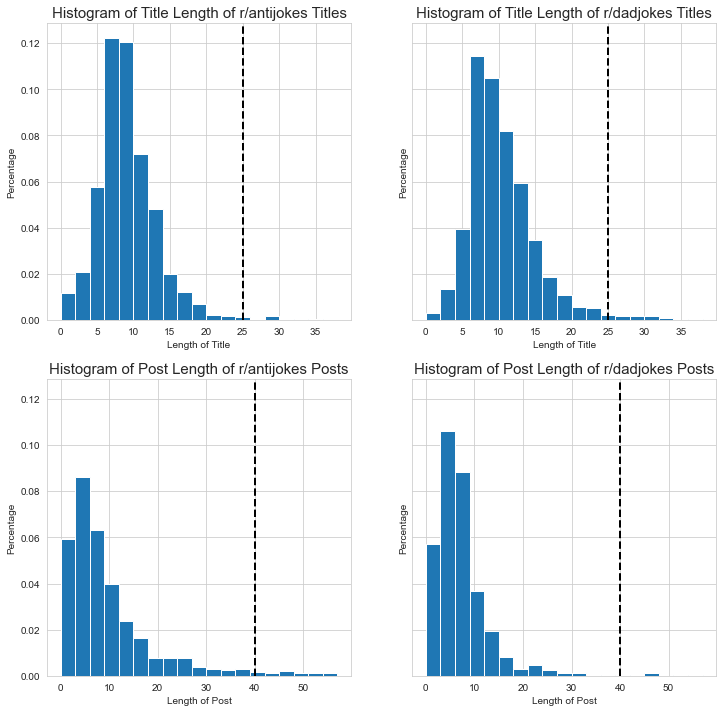

In [25]:
# plot histograms of the length of post and titles
# set range for length of title from 0 to 40
# set range for length of post from 0 to 60

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharey=True)

ax[0][0].hist(anti_df['title_len'], bins=range(0, 40, 2), density = True)
ax[0][0].set_title('Histogram of Title Length of r/antijokes Titles', fontsize=15)
ax[0][0].set_xlabel('Length of Title')
ax[0][0].set_ylabel('Percentage')
ax[0][0].axvline(x = 25, linewidth=2, ls = 'dashed', color='k')

ax[0][1].hist(dad_df['title_len'], bins=range(0, 40, 2), density = True)
ax[0][1].set_title('Histogram of Title Length of r/dadjokes Titles', fontsize=15)
ax[0][1].set_xlabel('Length of Title')
ax[0][1].set_ylabel('Percentage')
ax[0][1].axvline(x = 25, linewidth=2, ls = 'dashed', color='k')

ax[1][0].hist(anti_df['post_len'], bins=range(0, 60, 3), density = True)
ax[1][0].set_title('Histogram of Post Length of r/antijokes Posts', fontsize=15)
ax[1][0].set_xlabel('Length of Post')
ax[1][0].set_ylabel('Percentage')
ax[1][0].axvline(x = 40, linewidth=2, ls = 'dashed', color='k')

ax[1][1].hist(dad_df['post_len'], bins=range(0, 60, 3), density = True)
ax[1][1].set_title('Histogram of Post Length of r/dadjokes Posts', fontsize=15)
ax[1][1].set_xlabel('Length of Post')
ax[1][1].set_ylabel('Percentage')
ax[1][1].axvline(x = 40, linewidth=2, ls = 'dashed', color='k')

plt.tight_layout
plt.show()

**Observations**
1. For **posts**, majority have length less than 40.
2. For **titles**, majority have length less than 25.

I will select title with length less than 25, posts with length less than 40 and also both post and title length more than 3. This is because the dadjokes chosen should not be too long either as longer jokes may put off some readers.

In [26]:
# find number of records that fulfill the above requirement
len(anti_df[(anti_df['title_len'] <= 25) & (anti_df['post_len'] <= 40) &
           (anti_df['title_len'] >= 3) & (anti_df['post_len'] >= 3)])

649

In [27]:
# find number of records that fulfill the above requirement
len(dad_df[(dad_df['title_len'] <= 25) & (dad_df['post_len'] <= 40) &
           (dad_df['title_len'] >= 3) & (dad_df['post_len'] >= 3)])

1192

- For r/antijokes, there are **649 records** that fulfills the requirement.
- For r/dadjokes, there are **1192 records** that fulfills the requirement. 

The number of records **seems sufficient** for the analysis. 

I will also **randomly sample 650 records from r/dadjokes** so that I will have a balanced dataset.

In [28]:
# creating a new antijokes dataset with records meeting the requirement
antijokes = anti_df[(anti_df['title_len'] <= 25) & (anti_df['post_len'] <= 40) &
                    (anti_df['title_len'] >= 3) & (anti_df['post_len'] >= 3)].copy()

# creating a new dadjokes dataset with records meeting the requirement
dadjokes = dad_df[(dad_df['title_len'] <= 25) & (dad_df['post_len'] <= 40) &
                  (dad_df['title_len'] >= 3) & (dad_df['post_len'] >= 3)].copy()

# randomly sample 650 records from the dataset to obtain a balanced dataset
dadjokes = dadjokes.sample(n=650, random_state=11)

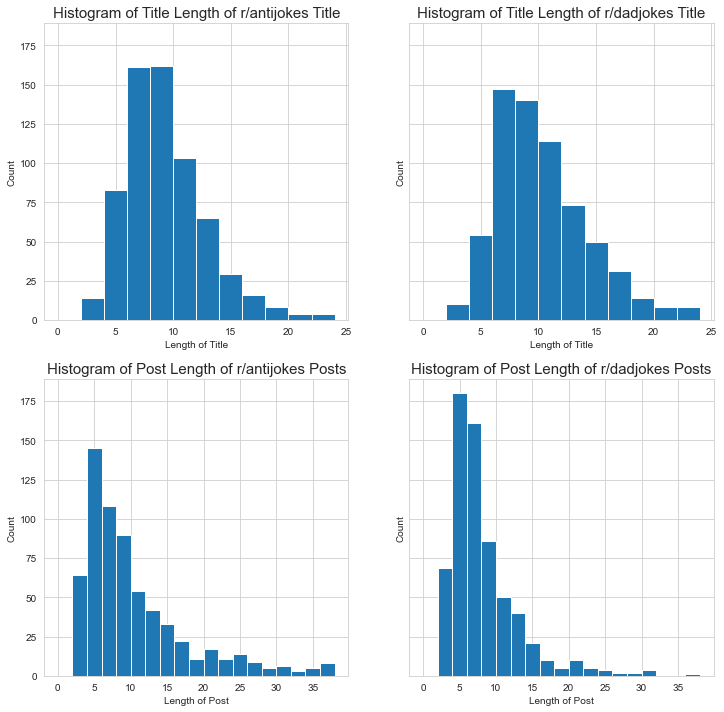

In [29]:
# plot histograms of the length of post and titles of the newly created datasets
# set range for length of title from 0 to 25
# set range for length of post from 0 to 40

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharey=True)
ax[0][0].hist(antijokes['title_len'], bins=range(0, 25, 2))
ax[0][0].set_title('Histogram of Title Length of r/antijokes Title', fontsize=15)
ax[0][0].set_xlabel('Length of Title')
ax[0][0].set_ylabel('Count')

ax[0][1].hist(dadjokes['title_len'], bins=range(0, 25, 2))
ax[0][1].set_title('Histogram of Title Length of r/dadjokes Title', fontsize=15)
ax[0][1].set_xlabel('Length of Title')
ax[0][1].set_ylabel('Count')

ax[1][0].hist(antijokes['post_len'], bins=range(0, 40, 2))
ax[1][0].set_title('Histogram of Post Length of r/antijokes Posts', fontsize=15)
ax[1][0].set_xlabel('Length of Post')
ax[1][0].set_ylabel('Count')

ax[1][1].hist(dadjokes['post_len'], bins=range(0, 40, 2))
ax[1][1].set_title('Histogram of Post Length of r/dadjokes Posts', fontsize=15)
ax[1][1].set_xlabel('Length of Post')
ax[1][1].set_ylabel('Count')

plt.tight_layout
plt.show()

After choosing the dataset, the records from both type of jokes have a similar distribution. This should reduce the impact of length/number of words affecting the model.

In [30]:
# create the combined text of title and post
dadjokes['combined'] = dadjokes['title'] + ' ' + dadjokes['post']
antijokes['combined'] = antijokes['title'] + ' ' + antijokes['post']

# EDA - Text Visualization

I will carry out some text EDA/visualization on the datasets.

## Top N K-gram Words Barplots

In [45]:
# create a function that will return the top N most frequent k-gram words
# it also takes in the stopwords if needed, default is set to None
def top_n_kgram_words(corpus, n, k, stopwords=None):

    cvec = CountVectorizer(ngram_range=(k, k), stop_words=stopwords).fit(corpus)

    bag_of_words = cvec.transform(corpus)

    words_appearance = bag_of_words.sum(axis=0)

    words_freq = [(word, words_appearance[0, index])
                  for word, index in cvec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return words_freq[:n]

# create a function that will plot barplots of the top N most frequent k-gram words
# it also takes in the stopwords if needed, default is set to None
def plot_top_n_kgram_words(col, n, k, title, stopwords=None):

    dad_temp = pd.DataFrame(data=top_n_kgram_words(dadjokes[col], n, k, stopwords=stopwords), columns=['Word', 'Frequency'])
    anti_temp = pd.DataFrame(data=top_n_kgram_words(antijokes[col], n, k, stopwords=stopwords), columns=['Word', 'Frequency'])

    fig, ax = plt.subplots(ncols=2, figsize=(14, 2+(n/2)))
    sns.barplot(data=dad_temp, y='Word', x='Frequency', palette='Reds_r', ax=ax[0])
    ax[0].set_title('r/dadjokes')
    ax[0].set_ylabel('')
    ax[0].set_xlabel('')

    sns.barplot(data=anti_temp, y='Word', x='Frequency', palette='Blues_r', ax=ax[1])
    ax[1].set_title('r/antijokes')
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')

    plt.suptitle(title, fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 1])
    plt.show()

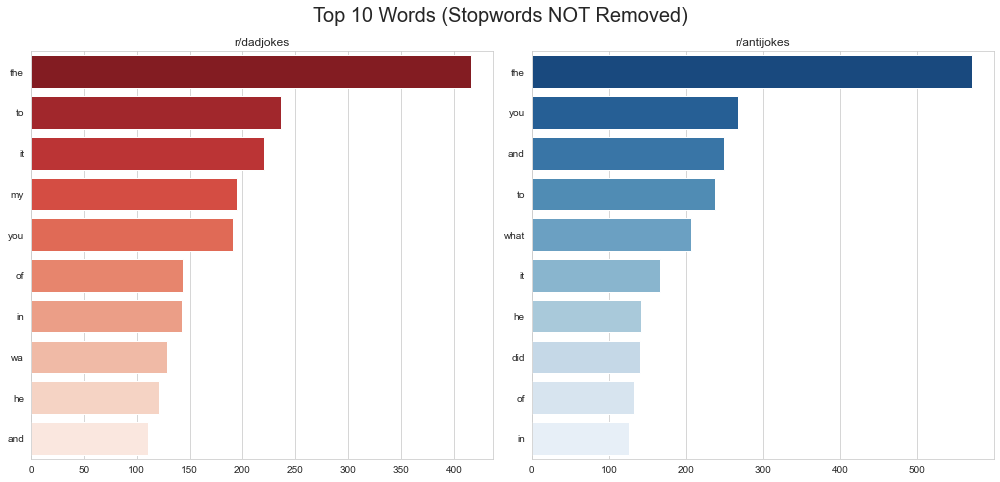

In [46]:
# plot the top 10 single words with stopwords not removed
plot_top_n_kgram_words('combined', 10, 1, 'Top 10 Words (Stopwords NOT Removed)', stopwords=None)

With stopwords not removed, **8/10 words** are repeated in both subreddits' top 10 most frequent words.

i.e. the, to, it, you, of, in, he, and

It may be more meaningful to plot the graphs with stopwords removed.

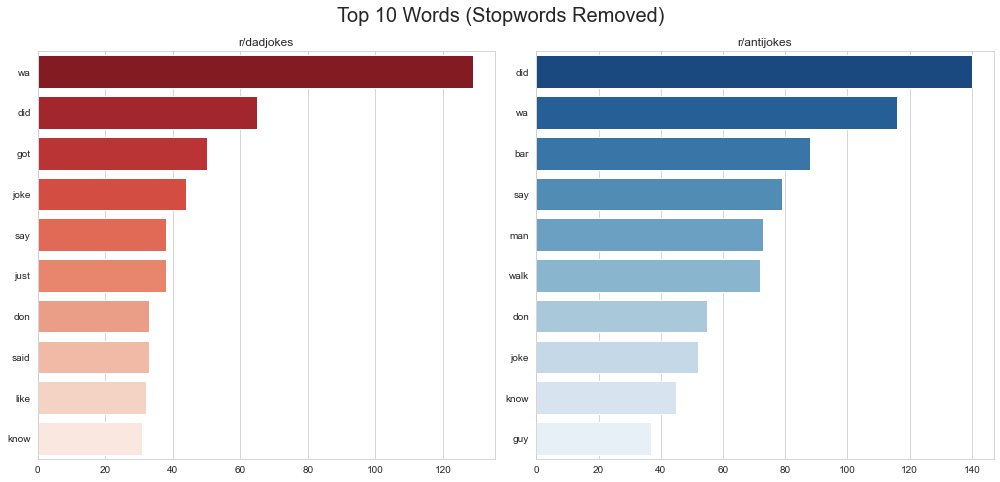

In [33]:
# plot the top 10 single words with stopwords removed
plot_top_n_kgram_words('combined', 10, 1, 'Top 10 Words (Stopwords Removed)', stopwords='english')

- Words only in top 10 words from r/dadjokes: **got, just, like**

- Words only in top 10 words of r/antijokes: **bar, man, walk, guy**

seems that there are many "man walk into a bar" joke in r/antijokes

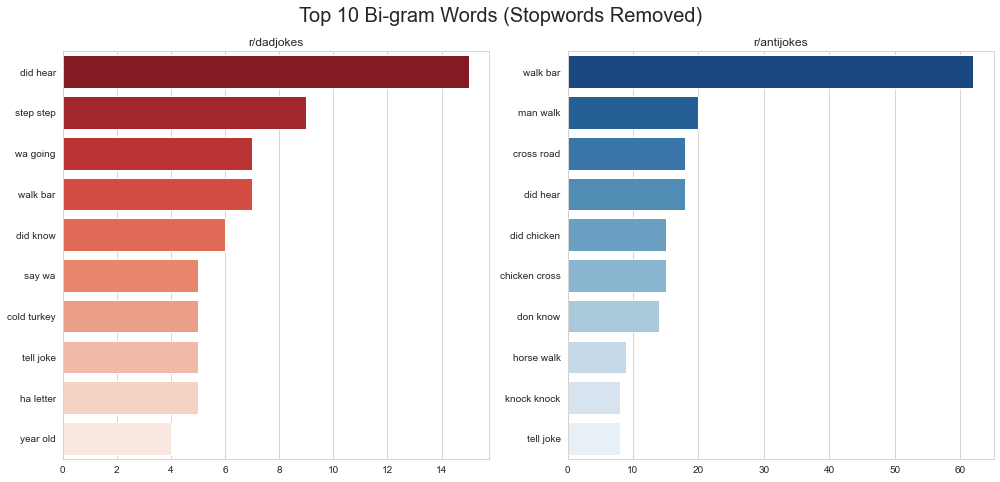

In [34]:
# plot the top 10 single bi-gram words with stopwords removed
plot_top_n_kgram_words('combined', 10, 2, 'Top 10 Bi-gram Words (Stopwords Removed)', stopwords='english')

In [35]:
print('Question:')
print(dadjokes[dadjokes['combined'].str.contains('step step')]['original_title'].tolist()[0])
print('Answer:')
print(dadjokes[dadjokes['combined'].str.contains('step step')]['original_post'].tolist()[0].replace('\n\n\n', ', '))

Question:
Here's a step-by-step guide on how to fall down stairs!
Answer:
Step 28, Step 27, Step 24, Step 21, Step 16, Step 12, Step 7, Step 3, Step 1


**Observations from the Top 10 Bi-gram Words**

r/antijokes:
- has a lot more **"walks into a bar"** joke.
- has more **"why did xx (chicken/horse) cross the road"** joke.

r/dadjokes:
- has **multiple "step step"** in r/dadjokes is from **ONLY one joke** (see above for the joke). Multiple "step step" bi-grams** was created due to the texting processing.

In general, the **top bi-gram words does not seem to occur very frequently** (mostly < 20). Also, "walks into a bar" joke also appears relatively frequent in dadjokes.

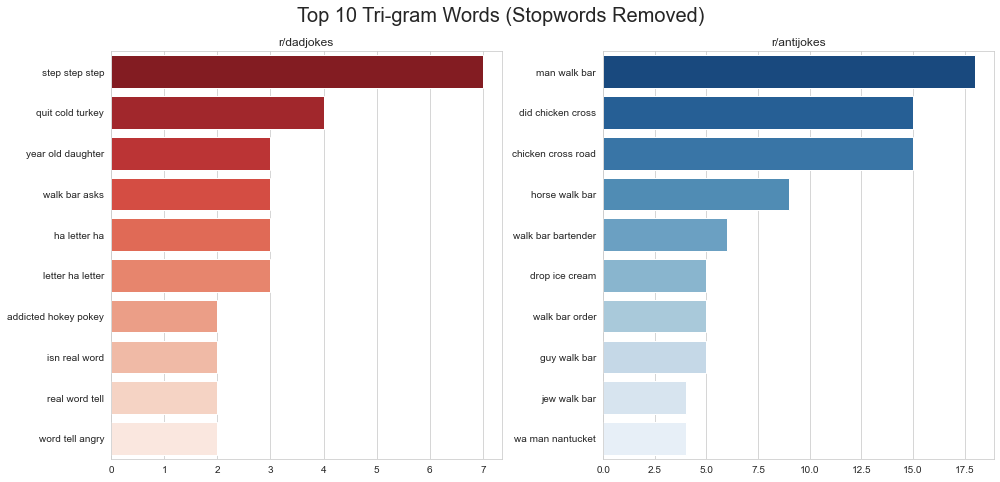

In [36]:
# plot the top 10 single tri-gram words with stopwords removed
plot_top_n_kgram_words('combined', 10, 3, 'Top 10 Tri-gram Words (Stopwords Removed)', stopwords='english')

**Observations from the Top 10 Tri-gram Words**

r/antijokes:
- has more **"drop ice cream" (new)** joke.
- has more **"walks into a bar"** joke.
- has more **"why did xx (chicken/horse) cross the road"** joke.

r/dadjokes :
- has more **"quit cold turkey"** joke (the phrase means to stop smoking/drugs)
- has more jokes mentioned **"year old daughter"**

In general, the **top tri-gram words occurs even less frequently than bi-grams words** (mostly < 10).

\
**Overall**

From the above analysis, I would expect that a model **with stopwords removed** would perform better, as the stopwords seems to be extremely common in both datasets and does not aid in classifying the subreddits.

Apart from that, I would expect **models with bi-grams or tri-grams to perform about the same as without n-gram** since the frequency of n-grams words is quite low.

## Wordcloud
I will also do a few wordcloud to explore the texts a bit more.

In [37]:
# create a string containing all the title and posts from antijokes dataset
# the string will be passed into the model for analysis and creation of wordcloud
antijokes_all_words = ''

for row in antijokes['combined']:
    antijokes_all_words = antijokes_all_words + row

In [38]:
# create a string containing all the title and posts from dadjokes dataset
# the string will be passed into the model for analysis and creation of wordcloud
dadjokes_all_words = ''

for row in dadjokes['combined']:
    dadjokes_all_words = dadjokes_all_words + row

In [39]:
# from the prior runs, it was found that the letters 't', 's', 'm' and 'wa' are very common
# and is not dropped by the default STOPWORDS dataset
STOPWORDS.add('t')
STOPWORDS.add('s')
STOPWORDS.add('m')
STOPWORDS.add('wa')

# plot a wordcloud taking in a string of text
# it also takes in a title which will be plotted as the title
# stopwords is used as previous visualization showed us that there are many common words otherwise
def plot_cloud(text1, title1, text2, title2):

    # generate wordcloud
    wordcloud1 = WordCloud(width=1500, height=2000, random_state=11,
                          colormap='Set2', collocations=False, stopwords=STOPWORDS).generate(text1)
    
    wordcloud2 = WordCloud(width=1500, height=2000, random_state=11,
                          colormap='Set2', collocations=False, stopwords=STOPWORDS).generate(text2)
    
    fig, ax = plt.subplots(ncols =2, figsize=(16, 10))
    ax[0].imshow(wordcloud1)
    ax[0].set_title(title1, fontsize=20)
    # no axis details
    ax[0].set_axis_off()
    
    ax[1].imshow(wordcloud2)
    ax[1].set_title(title2, fontsize=20)
    # no axis details
    ax[1].set_axis_off()
    
    plt.tight_layout()
    plt.show()

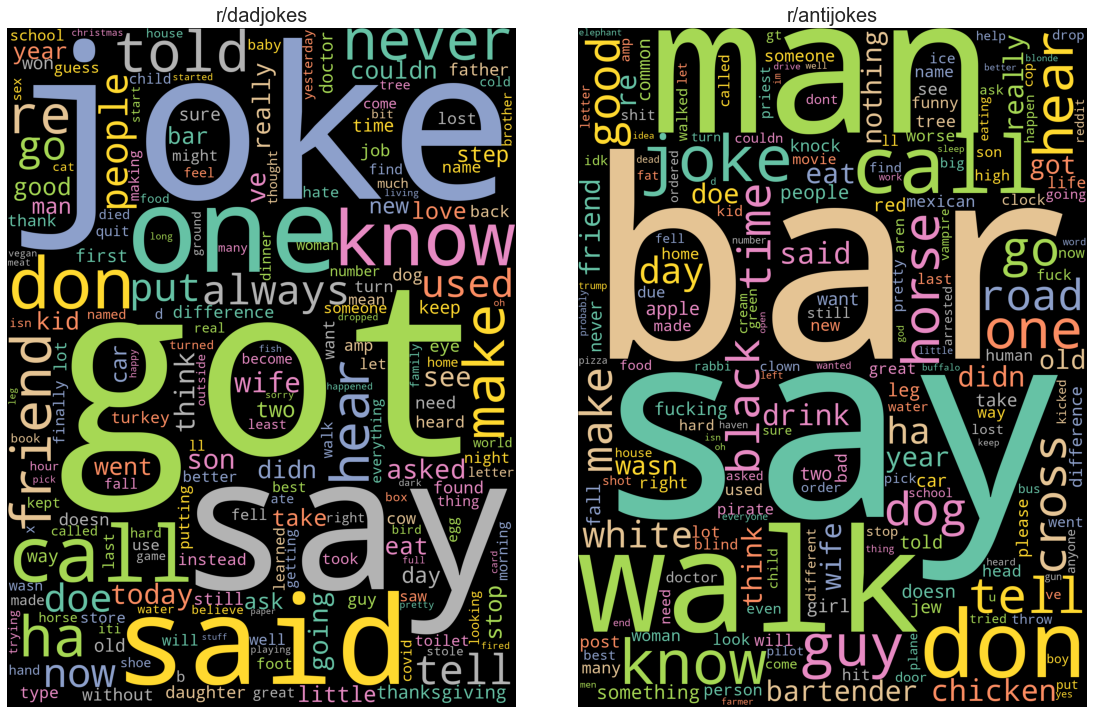

In [40]:
# plot wordcloud of all the text in antijokes and dadjokes dataset
plot_cloud(dadjokes_all_words, 'r/dadjokes', antijokes_all_words, 'r/antijokes')

**Observation from WordCloud**
- Frequently occurring words are similarly to what has been observed in the Top N Words graphs.
- Again, the obvious difference is that antijokes have more **"man walk into a bar"** jokes than dadjokes.
- Most words are **common words** that can be found in both sides.

**General Conclusion from EDA**

I believe that the models **might not perform very well/accurately** as:
1. Most of the words are **common words** and there isn't too many words that only occurs highly in dadjokes or antijokes
2. The difference between dadjokes and antijokes is not in the words used but in the **context and prior understanding** of the joke which the models is unable to comprehend

# Save Cleaned Dataset
I will save the dataset to be used for modeling in the next notebook to reduce the notebook length. Code below is commented out so as to not repeatedly run it.

In [41]:
# dadjokes.to_csv('../datasets/dadjokes_cleaned.csv', index = False)
# antijokes.to_csv('../datasets/antijokes_cleaned.csv', index = False)